# Linear Regression with Tensorflow 2.0
## Data 전처리

[7. 0. 3. 6. 2. 1. 9.] [20. 10. 15. 18. 14. 12. 25.]


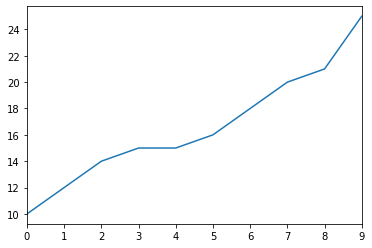

In [37]:
# https://towardsdatascience.com/get-started-with-tensorflow-2-0-and-linear-regression-29b5dbd65977의 자료를 따라하며 정리한 것임.

#Linear Regression 
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# 임의로 데이터 생성 shape:(10, 2).. 임의 데이터
input_data = [[0, 10],
             [1, 12],
             [2, 14],
             [3, 15],
             [4, 15],
             [5, 16],
             [6, 18],
             [7, 20],
             [8, 21],
             [9, 25]]

pd_data = pd.DataFrame(input_data, columns=['Days', 'Intake'])
#print(pd_data)

train_X, test_X, train_Y, test_Y = train_test_split(pd_data['Days'],
                                                    pd_data['Intake'],
                                                    test_size = 0.3)
# training에 사용할 data
X = tf.constant(train_X, dtype=tf.float32)
Y = tf.constant(train_Y, dtype=tf.float32)

# test에 사용할 data
t_X = tf.constant(test_X, dtype=tf.float32)
t_Y = tf.constant(test_Y, dtype=tf.float32)

print(X.numpy(), Y.numpy())

pd_data['Intake'].plot() # 판다스 데이터프레임에서 바로 plot 가능..

# Hypothesis , MSE, MSE' 정의

In [38]:
def mean_squared_error (Y, y_pred):  # 그래프에 출력할때 사용. 학습시에는 MSE`(MSE_deriv)을 사용함.
    return tf.reduce_mean(tf.square(y_pred - Y)) 

def mean_squared_error_deriv (Y, y_pred): # 학습에 사용되는 함수
    return tf.reshape(tf.reduce_mean(2*(y_pred- Y)), [1,1])  # 2*(y_pred-Y) : (y_pred - Y)^2의 미분형태
#tf.reshape는 해당 텐서를 옵션으로준 shape 모양으로 바꾸어줌.

def h (X, weights, bias):
    return tf.tensordot(X, weights, axes=1) + bias # tensordot : dot product? : matmul과 동일?

# Training Parameter 지정 및 학습

Loss is 119.1183853149414
Loss is 119.17803192138672
Loss is 119.2381591796875
Loss is 119.2988052368164
Loss is 119.35993194580078
Loss is 119.42153930664062
Loss is 119.48363494873047
Loss is 119.54620361328125
Loss is 119.60924530029297
Loss is 119.6727294921875
Loss is 119.73668670654297
Loss is 119.80107879638672
Loss is 119.86590576171875
Loss is 119.9311752319336
Loss is 119.99687957763672
Loss is 120.06299591064453
Loss is 120.12953186035156
Loss is 120.19647979736328
Loss is 120.26383972167969
Loss is 120.33159637451172
Loss is 120.39974212646484
Loss is 120.4682846069336
Loss is 120.53720092773438
Loss is 120.60651397705078
Loss is 120.67619323730469
Loss is 120.74623107910156
Loss is 120.81664276123047
Loss is 120.88740539550781
Loss is 120.9585189819336
Loss is 121.02998352050781
Loss is 121.10179138183594
Loss is 121.17391967773438
Loss is 121.24638366699219
Loss is 121.31918334960938
Loss is 121.3923110961914
Loss is 121.46575164794922
Loss is 121.53948211669922
Loss is 1

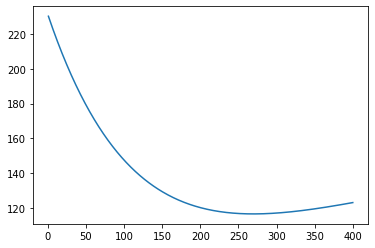

In [79]:
num_epochs = 400
num_samples = X.shape[0]  # 훈련 dataset의 데이터 개수를 뜻함 : 위에서 70퍼센트로 지정했으므로 7개임
batch_size = 7 # 훈련데이터셋에서 한번에 얼마나 학습할지(batch) size 지정
# 굳이 전체 데이터를 batch로 나누어서 학습하는 이유? 
# 메모리 용량의 한계때문에, 모든 훈련셋을 메모리에 다 불러올 수 없는 경우가 많기 때문임.

learning_rate = 0.0001

# tf.data.Dataset 객체는 데이터와 batch를 효율적으로 저장한다.
dataset = tf.data.Dataset.from_tensor_slices(( X , Y )) 
# from_tensor_slices : Creates a Dataset whose elements are slices of the given tensors
# X와 Y의 slice(일부)를 반환한다는 것 같음.
dataset = dataset.shuffle( 500 ).repeat( num_epochs ).batch( batch_size ) # shuffle?
iterator = dataset.__iter__() # iterator, dataset에서 batch를 가리키는 반복자



num_features = 1 # 속성의 수가 2이상인 경우 X.shape[1]로 해야 맞지만, 내가 만든데이터처럼 1개일때는 1로 인식이 안되므로.. 1로 직접 넣어주었음..
weights = tf.random.normal((num_features, 1)) # 가설의 W
bias = 0 # 가설의 b

# 그래프 출력용..
epochs_plot = list() # 그래프 x축
loss_plot = list() #그래프 y축

for i in range(num_epochs) : # training set을 총 반복할 횟수 : num_epochs
    epoch_loss = list()
    for b in range(int(num_samples/batch_size)): # training set(num_samples개)을 batch size만큼 나누어서 학습하므로..
        x_batch, y_batch = iterator.get_next()
        x_batch = tf.reshape(x_batch, shape=(7,1)) # 1차원 행렬(즉, (1,7))로 인식해서 계산이 안되므로, shape를 (7,1)로 변경 필수
        
        output = h(x_batch, weights, bias)
        #print(output) # output은 batch에 대한 예측값이 저장됨.
        loss = epoch_loss.append(mean_squared_error(y_batch, output).numpy())
        
        dJ_dH = mean_squared_error_deriv( y_batch , output) # y_batch(정답)과 예측값(output)으로 MSE`(prime)을 구한다
        dH_dW = x_batch
        dJ_dW = tf.reduce_mean( dJ_dH * dH_dW ) # round Loss/ round W = (round Loss / round h) * (round h / round W)
        dJ_dB = tf.reduce_mean( dJ_dH )
        
        
        # W와 b를 update
        weights -= ( learning_rate * dJ_dW )
        bias -= ( learning_rate * dJ_dB ) 
        
        
    loss = np.array( epoch_loss ).mean()
    epochs_plot.append( i + 1 )
    loss_plot.append( loss ) 
    
    print( 'Loss is {}'.format( loss ) ) 

plt.plot( epochs_plot , loss_plot ) 
plt.show()

# Test Data에 적용해보기

In [80]:
t_X = tf.reshape(t_X, [t_X.shape[0],1]) # (3,1)로 변경
test_out = h(t_X, weights, bias)
print(test_out)
label = t_Y
print(label)

print("\nRegression Equation : Y = X", weights.numpy()[0,0], " + ", bias.numpy()) # tensor를 numpy로 변환!

tf.Tensor(
[[15.614304]
 [24.60669 ]
 [12.616842]], shape=(3, 1), dtype=float32)
tf.Tensor([16. 21. 15.], shape=(3,), dtype=float32)

Regression Equation : Y = X 2.9974618  +  0.62699515


# 그래프 출력

0     0.626995
1     3.624457
2     6.621919
3     9.619381
4    12.616842
5    15.614304
6    18.611766
7    21.609228
8    24.606690
9    27.604151
Name: Days, dtype: float64


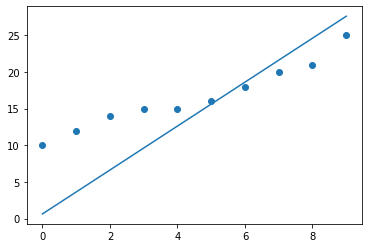

In [81]:
plt.scatter(pd_data['Days'], pd_data['Intake'])

#직선 방정식
g_y = weights.numpy()[0,0]*pd_data['Days'] + bias.numpy()
print(g_y)
plt.plot(pd_data['Days'], g_y)

# 참고
 tf.GradientTape()는 미분 값을 구해주는 메소드임. 다른 Cost function의 학습을 위해서 공부 필요